# Create your first ML Model - Titanic Dataset

In this workshop we will explore one of the "Hello-World" datasets of machine learning, the Titanic dataset. This was also a challenge on [Kaggle](https://www.kaggle.com/competitions/titanic/overview).

Goals:

* Create a machine learning model to predict..
* Calculate the survival chance if you were on board

In [15]:
# import ML libraries
import numpy as np 
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

## Data Importing

In [16]:
# More information on the dataset https://www.kaggle.com/competitions/titanic/overview
test_df = pd.read_csv("titanic/test.csv")
train_df = pd.read_csv("titanic/train.csv")

## Data Exploration

In [17]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### First Conclusions

**Useful Data**:

* Age: Age in years
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Fare: Passenger fare
* Survived: Survived or not
* pclass: Ticket class
* sex: Sex
* embarked: Port of Embarkation

**Does it contain important information?**:

* PassengerId: Unique ID of a passenger
* Name: Name
* ticket: Ticket number
* cabin: Cabin number


**Contains Null-data**:

* Age
* Cabin
* Embarked

## Data Analysis

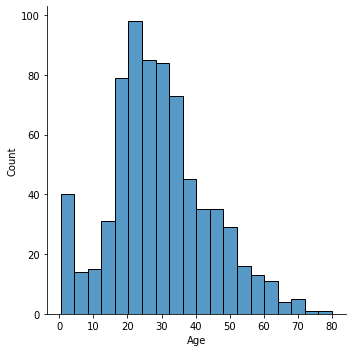

In [21]:
sns.displot(train_df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

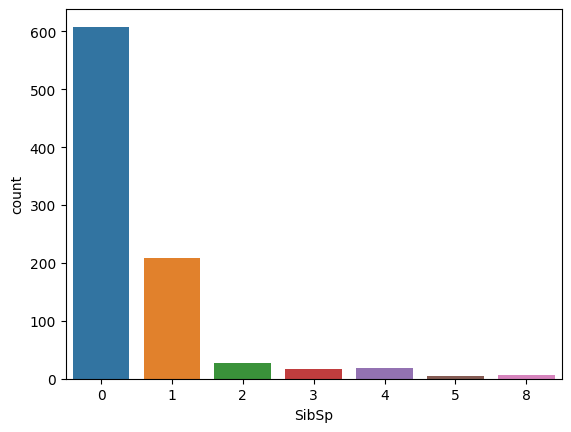

In [22]:
sns.countplot(data=train_df, x="SibSp")

<AxesSubplot:xlabel='Parch', ylabel='count'>

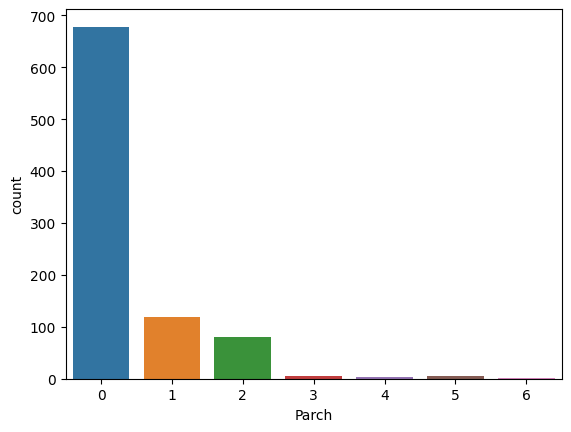

In [23]:
sns.countplot(data=train_df, x="Parch")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

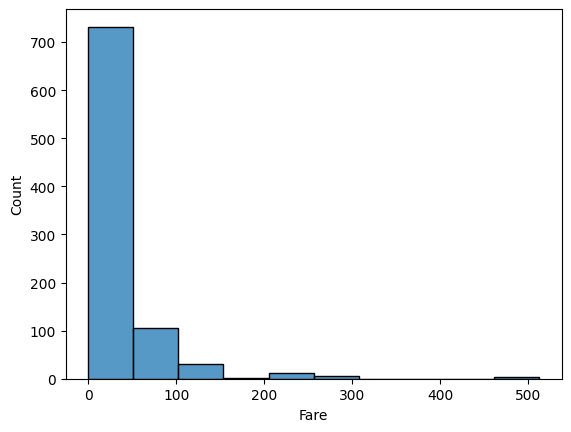

In [24]:
sns.histplot(data=train_df, x="Fare",bins=10)

<AxesSubplot:xlabel='Sex', ylabel='count'>

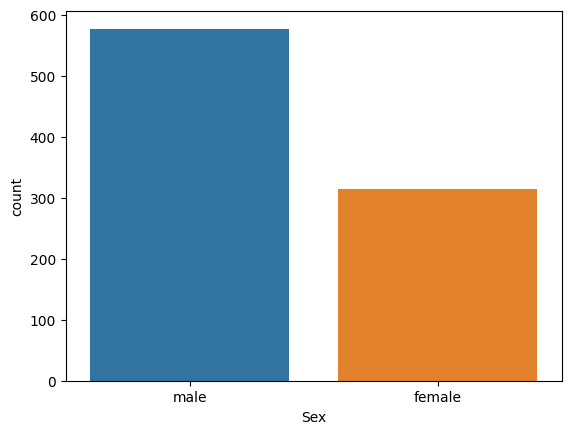

In [25]:
sns.countplot(x=train_df["Sex"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

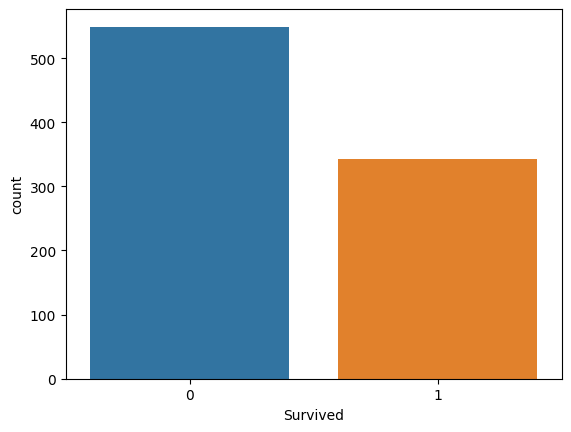

In [26]:
sns.countplot(x=train_df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

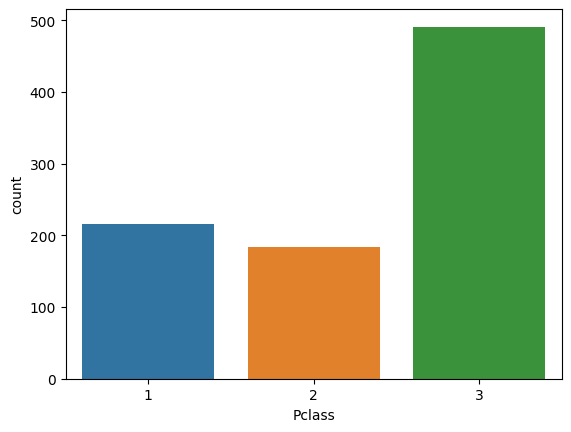

In [27]:
sns.countplot(x=train_df["Pclass"])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

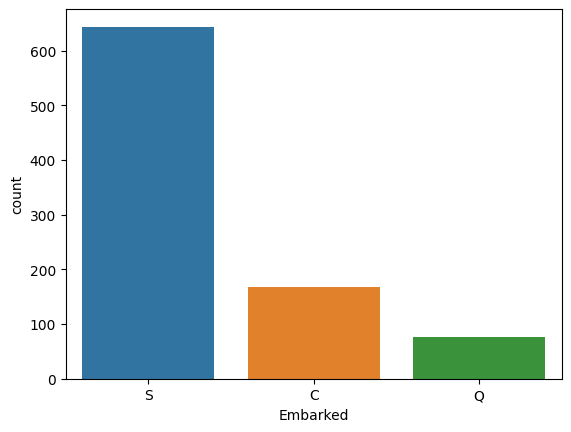

In [28]:
sns.countplot(x=train_df["Embarked"])

### Finding Correlations

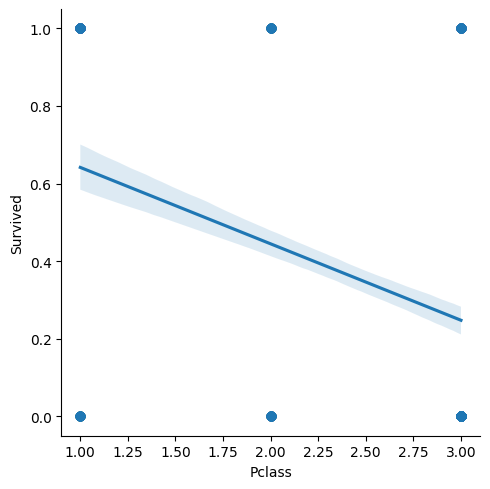

In [29]:
sns.lmplot(x='Pclass',y='Survived',data=train_df)

# Can you explain the model?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

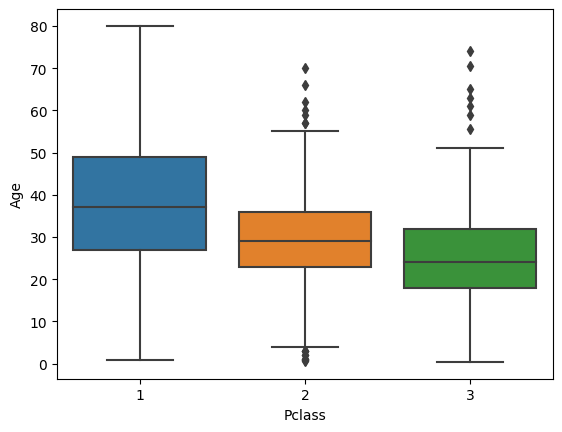

In [30]:
sns.boxplot(data=train_df,x="Pclass",y="Age")

# Can you explain the boxplot?

In [31]:
pd.pivot_table(train_df,index="Survived",columns="Pclass",values="PassengerId",aggfunc="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived', ylabel='count'>

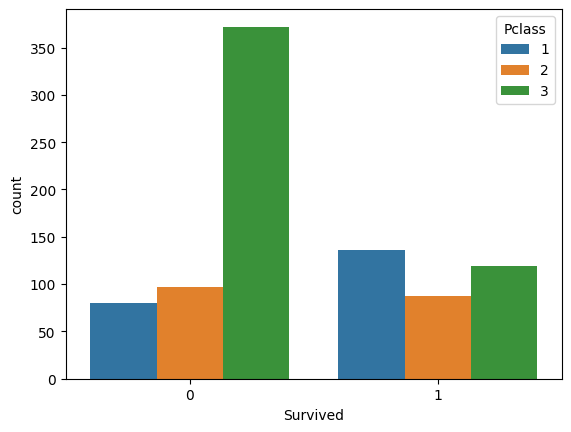

In [32]:
sns.countplot(data=train_df,x="Survived",hue="Pclass")

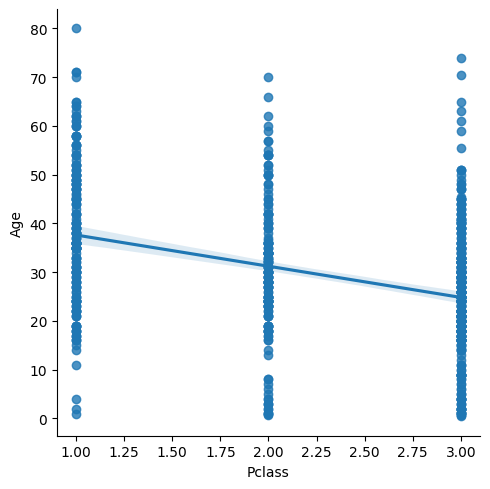

In [33]:
sns.lmplot(x='Pclass',y='Age',data=train_df)

## Feature Engineering

### PassengerId

In [34]:
train_df["PassengerId"].value_counts()

# Is this useful data?

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

### Ticket

In [35]:
train_df["Ticket"].value_counts()

# Is this useful data? What could we do more to define it?

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### Cabin

In [36]:
train_df["Cabin"].value_counts()

# Is this useful data? What could we do more to define it?

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### Name

In [37]:
train_df["Name"].head(10)

# Is this useful data? Can we filter more information from the names?

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [38]:
# There is a pattern!

# Example:
s = "Braund, Mr. Owen Harris"
print(s.split(",")[1].split(".")[0].strip())

Mr


In [39]:
# Creating a new column named Name_title
# We need to do that for the train AND test dataframe

both_dfs = [train_df, test_df]

for dataset in both_dfs:
    dataset["Name_title"] = dataset.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

## Data Pre-Processing

After our data analysis and feature engineering, we can now prepare our data for pre-processing.

**Leave**:

* Survived
* Sex
* Age
* SibSp
* Parch
* Pclass
* Fare
* Embarked

**Drop**:

* PassengerId - just the unique ID
* Name - Extracting the title, then dropping the whole passenger name
* Ticket - maybe extract letters. Drop for now.
* Cabin - too many null data rows

**Add new column**:
    
* Name_title

### Sex

In [40]:
# We need to convert categorical features to numeric values.
# Otherwise the machine learning algorithm won't be able to directly take in those features as inputs
# We define a 0 for male and a 1 for female
# We need to apply this to the train AND test dataset

genders = {"male": 0, "female": 1}
both_dfs = [train_df, test_df]

for dataset in both_dfs:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Age

In [41]:
# As we know, we have missing Age-values in the train AND test df
# Therefore, we apply the mean age of all passengers

both_dfs = [train_df, test_df]

for dataset in both_dfs:
    dataset["Age"] = dataset["Age"].fillna(dataset.Age.mean())

In [42]:
train_df["Age"].isna().sum() # double check if there are any na values

0

In [43]:
test_df["Age"].isna().sum() # double check if there are any na values

0

### Fare

In [44]:
# There is one missing fare value in the test dataset, which is not allowed.
test_df.isna().sum().sort_values(ascending=False)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Name_title       0
dtype: int64

In [45]:
# We will just drop this data row from the test_df

test_df.dropna(subset=["Fare"],inplace = True)

### Embark

In [46]:
# At first we are dropping the 2 datarows where we don't have any data about their embarking
# Alternatively we could have filled this value with the most common embarking port

train_df.dropna(subset=["Embarked"],inplace = True)

# Same as with the genders we need to put this feature into a numeric value

cities = {"S": 0, "C": 1, "Q": 2}
both_dfs = [train_df, test_df]

for dataset in both_dfs:
    dataset['Embarked'] = dataset['Embarked'].map(cities)

Survived, SibSp, Parch, Pclass don't any processing

### Name & Name_title

In [47]:
# Let's check our extracted titles again

train_df["Name_title"].value_counts() #checking the unique value counts on the train_df

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name_title, dtype: int64

In [48]:
test_df["Name_title"].value_counts()

Mr        239
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name_title, dtype: int64

In [49]:
# We should clean up Name_title a little bit:

# aggregating some common titles into a new category
# correcting misspelled titles
# creating a numeric categorization

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
both_dfs = [train_df, test_df]

for dataset in both_dfs:
    
    # replace titles with a more common title or as Special
    dataset['Name_title'] = dataset['Name_title'].replace(['Lady','the Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
    dataset['Name_title'] = dataset['Name_title'].replace('Mlle', 'Miss')
    dataset['Name_title'] = dataset['Name_title'].replace('Ms', 'Miss')
    dataset['Name_title'] = dataset['Name_title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Name_title'] = dataset['Name_title'].map(titles)

train_df["Name_title"].value_counts() #checking the new unique value counts on the train_df

1    517
2    184
3    125
4     40
5     23
Name: Name_title, dtype: int64

### Dropping Columns

In [50]:
# Dropping columns / data which is not needed
# we need to do that on both datasets!
    
train_df = train_df.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)
test_df = test_df.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

## Final Data Checking

In [51]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


In [52]:
# Are there any na fields?
train_df.isna().sum().sort_values(ascending=False)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Name_title    0
dtype: int64

In [53]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,0,3
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,3


In [54]:
# Are there any na fields?
test_df.isna().sum().sort_values(ascending=False)

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Name_title    0
dtype: int64

## Building the Machine Learning Model

In [55]:
# Now it's time to build the ML model

# Fortunately, the dataset is already splitted in a training and test dataset

# For training the modeL:
x_train = train_df.drop("Survived", axis=1) # hiding the result
y_train = train_df["Survived"] #df with the result

# For testing the model:
x_test = test_df 

In [56]:
print(x_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Name_title
0         3    0  34.50000      0      0    7.8292         2           1
1         3    1  47.00000      1      0    7.0000         0           3
2         2    0  62.00000      0      0    9.6875         2           1
3         3    0  27.00000      0      0    8.6625         0           1
4         3    1  22.00000      1      1   12.2875         0           3
..      ...  ...       ...    ...    ...       ...       ...         ...
413       3    0  30.27259      0      0    8.0500         0           1
414       1    1  39.00000      0      0  108.9000         1           5
415       3    0  38.50000      0      0    7.2500         0           1
416       3    0  30.27259      0      0    8.0500         0           1
417       3    0  30.27259      1      1   22.3583         1           4

[417 rows x 8 columns]


### Logistic Regression

In [57]:
# Since we have a classification problem, let's try with a logistic regression model

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

y_pred = logmodel.predict(x_test)

acc_log = round(logmodel.score(x_train, y_train) * 100, 2)

print(acc_log)

81.21


/Users/flpachin/Library/Caches/pypoetry/virtualenvs/mlenv-biitcnm1-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
predictions = cross_val_predict(logmodel, x_train, y_train)
confusion_matrix(y_train, predictions)

/Users/flpachin/Library/Caches/pypoetry/virtualenvs/mlenv-biitcnm1-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/flpachin/Library/Caches/pypoetry/virtualenvs/mlenv-biitcnm1-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

array([[474,  75],
       [ 94, 246]])

Feature: 0, Score: -0.99157
Feature: 1, Score: 2.20429
Feature: 2, Score: -0.03954
Feature: 3, Score: -0.41520
Feature: 4, Score: -0.19932
Feature: 5, Score: 0.00358
Feature: 6, Score: 0.21283
Feature: 7, Score: 0.49728


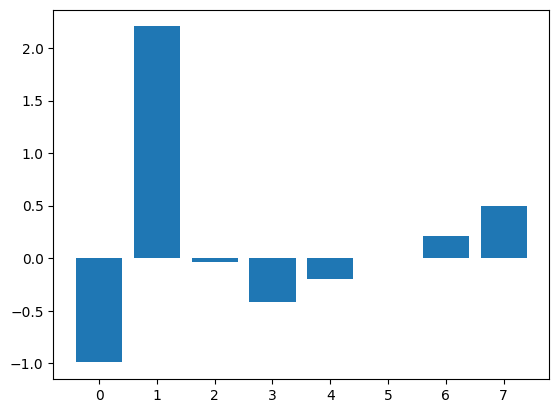

In [59]:
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Test the Model yourself

In [60]:
# Pclass = 1,2,3
# Sex = {"male": 0, "female": 1} 
# Age = you age
# SibSp - with how many siblings did you travel?
# Parch - with how many children/parents did you travel?
# Fare - How much did you pay for the ticket?
# Embarked = {"Southampton": 0, "C": 1, "Q": 2}
# Name_title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}

yourself = [[1,1,31,0,0,50,0,1]]

predict_yourself = logmodel.predict(yourself)

print(predict_yourself)

[1]


/Users/flpachin/Library/Caches/pypoetry/virtualenvs/mlenv-biitcnm1-py3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Outcome of this lab

Thanks! I hope you've enjoyed this lab!

What did you learn today?

* Good Data is important!
* Data Cleaning + pre-processing takes a lot of time
* Domain knowledge is important
* Selecting the right model depends on the scenario